# Hierachical Clustering

<span> Grouping you data points into groups using Hierarchical Clustering can make it easier you to see similiaries betweent your data. There multiple approaches to conduct hierachical clustering, for this notebook we will be using seaborn and scipy.</span>

### Import Preliminaries

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import warnings

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

# Agglomerative Clustering

<span>Agglomerative Cluster is a clustering method that works under the assumption that each points in the datasets is it's own cluster and that some cluster are more simliare to others. Therefore you can work you ways upwards from each datapoint being it's own cluster and started merging cluster together based on a distance measurment. As you work your way up, the cluster's will begin converging based on their simliarities. Agglomerative clustering falls under the category of heirarchical clustering methods, and is the brother to Divisive clustering. While both are simliar hierarichal clustering methods. Agglomerative Clustering is the "bottom-up" uproach while Divisive Clustering would be the "top down" approach. </span>

### Import Data

In [8]:
# Import Data
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

wdf = pd.DataFrame(wine.data, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(wine.target, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,1065.000,0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,1050.000,0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,1185.000,0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,1480.000,0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


### Ground Truth

In [9]:
# Target clases
train_y

array([1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0,
       2])

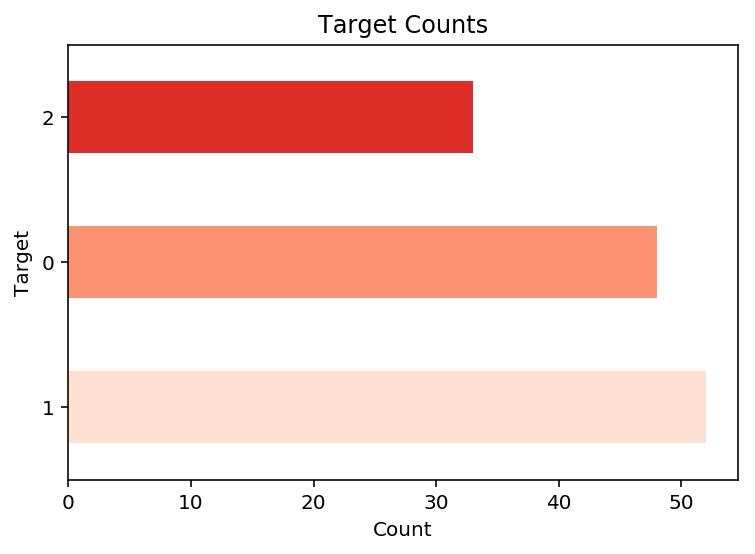

In [10]:
# Plot Target Counts 
target_counts = pd.Series(train_y).value_counts()
target_counts.plot.barh(colors=['#fee0d2','#fc9272','#de2d26']);
plt.title('Target Counts')
plt.xlabel('Count')
plt.ylabel('Target');

### Scipy

In [21]:
linkagemat = linkage(X, 'average')
pd.DataFrame(linkagemat).head()

,0,1,2,3
0,160.000,165.000,2.611,2.000
1,67.000,106.000,2.655,2.000
2,13.000,50.000,2.950,2.000
3,8.000,9.000,3.270,2.000
4,101.000,119.000,3.479,2.000


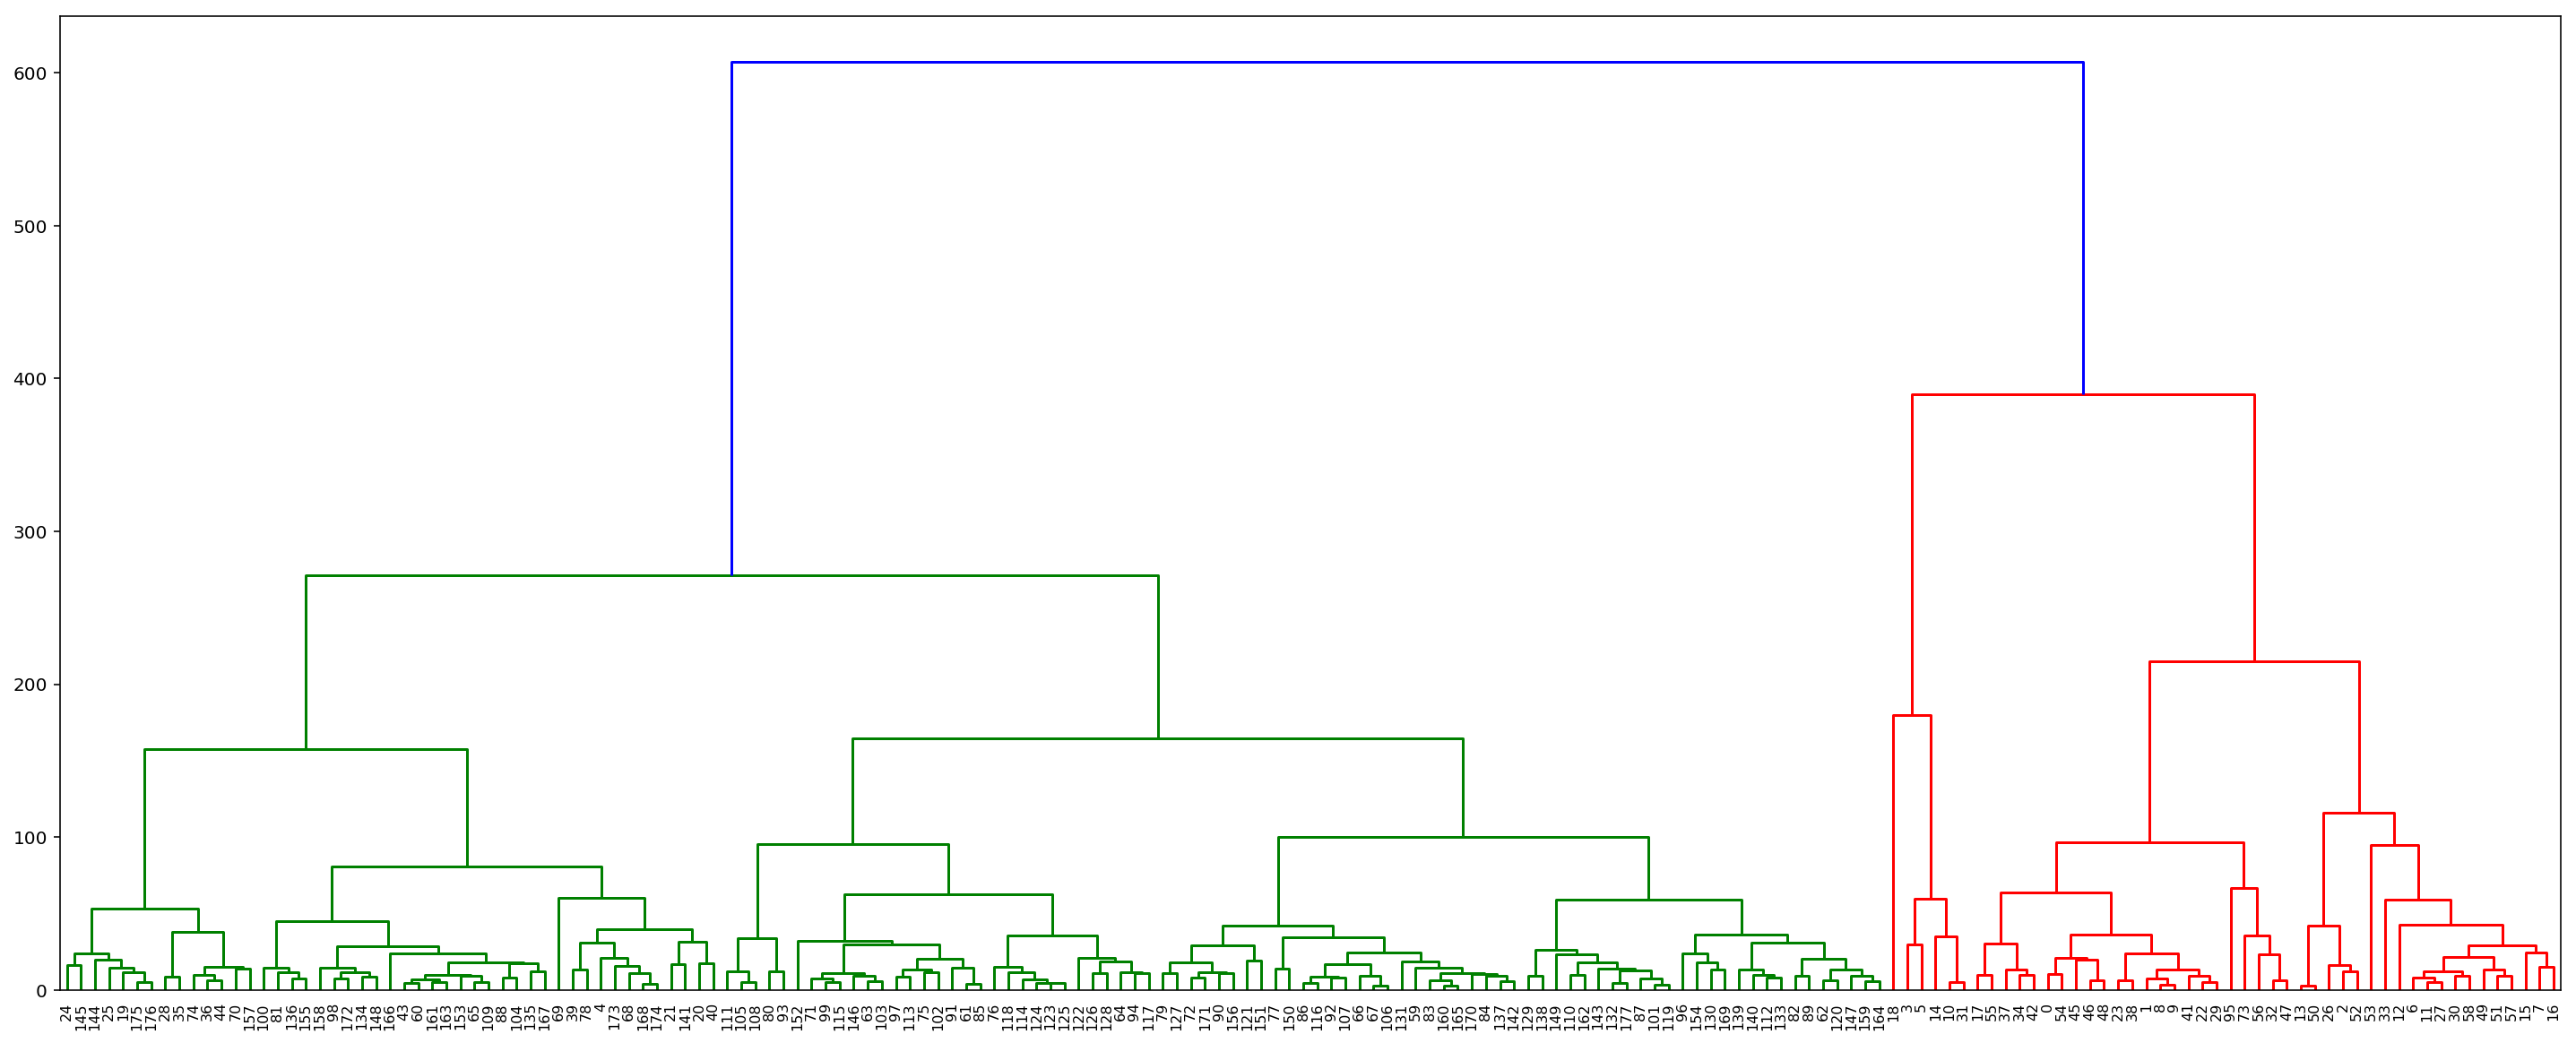

In [22]:
# Change figure size, and plot dendogram 
plt.figure(figsize=(25, 10))
dendrogram(
    linkagemat,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
);

### Sklearn

In [23]:
# Fit the model
agglom = AgglomerativeClustering(n_clusters=3)
agglom.fit(train_x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x108ab7158>)

Dbscan has not predict method. There are no centroide in the dbscan algorithim but we can use the fit_transform method a piece of the data.

### Clusters

In [24]:
#View training predictions
pred_train_y = agglom.fit_predict(train_x)
pred_train_y

array([2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       1])

In [25]:
# Number of Leaves in the cluster
print(f'Number of leave in our tree: {agglom.n_leaves_}')

Number of leave in our tree: 133


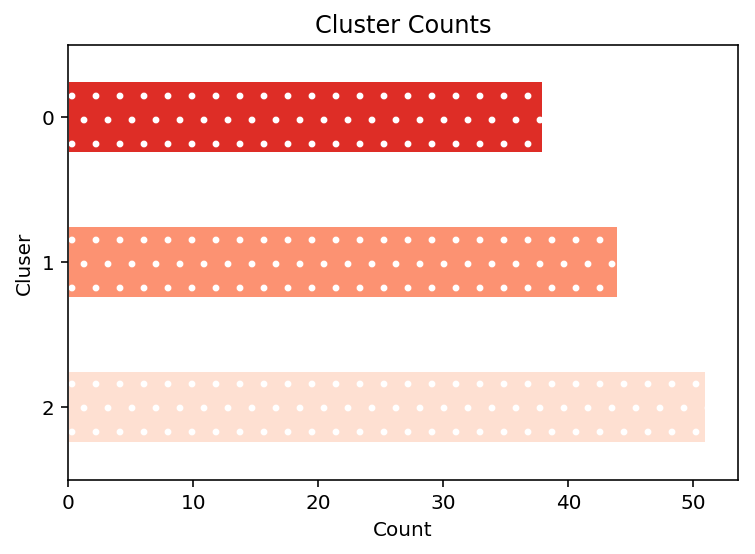

In [26]:
# Plot Cluster Counts 
target_counts = pd.Series(pred_train_y).value_counts()
target_counts.plot.barh(colors=['#fee0d2','#fc9272','#de2d26'], 
                        edgecolor='white',hatch='.');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

### Linkage Options

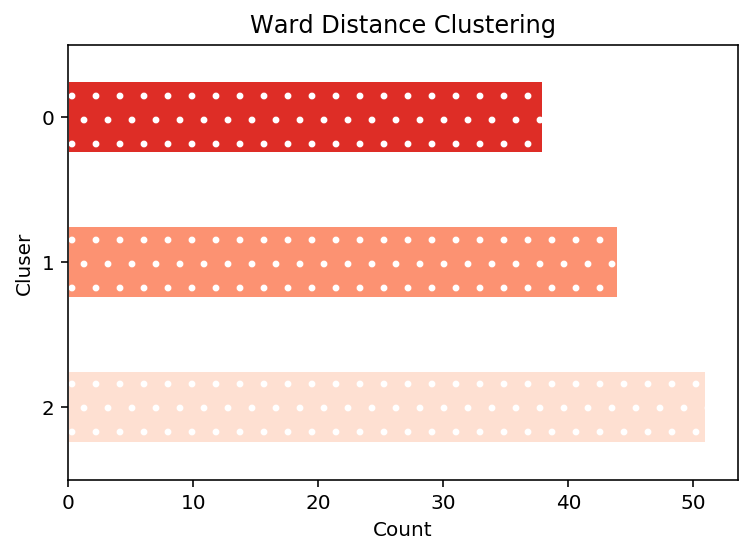

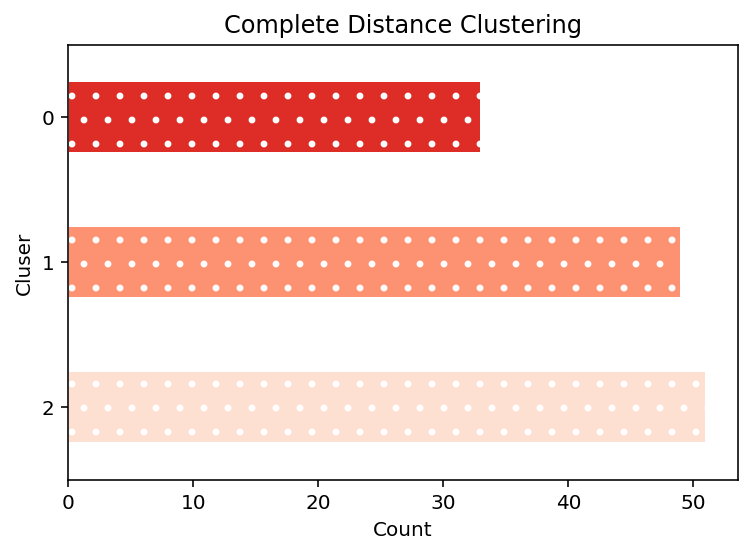

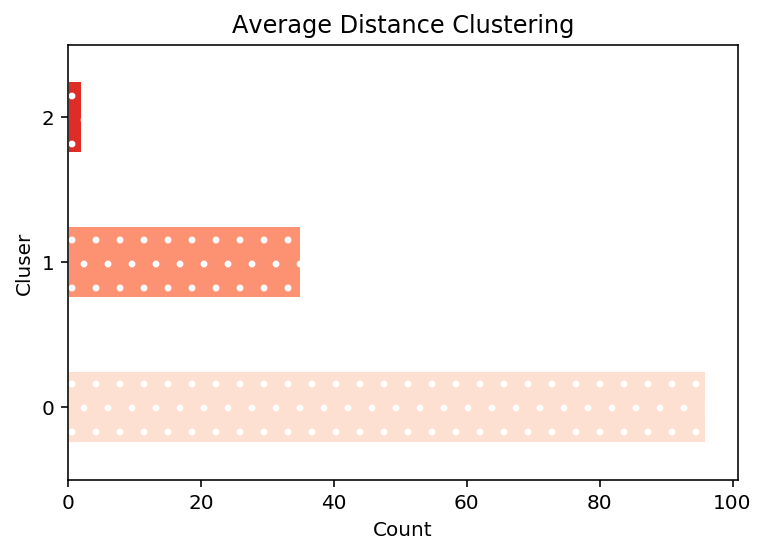

In [27]:
# Define paraameter range and score lists
linkage_range = ['ward', 'complete', 'average']

# Train a knn_model for every neighbour value in our list
for i in linkage_range:
    plt.figure()
    agglom = AgglomerativeClustering(n_clusters=3, linkage=i)
    pred_train_y = agglom.fit_predict(train_x)
    
    target_counts = pd.Series(pred_train_y).value_counts()
    target_counts.plot.barh(colors=['#fee0d2','#fc9272','#de2d26'], 
                            edgecolor='white',hatch='.');
    plt.title(str.title(i)+' Distance Clustering')
    plt.xlabel('Count')
    plt.ylabel('Cluser');

### Seaborn

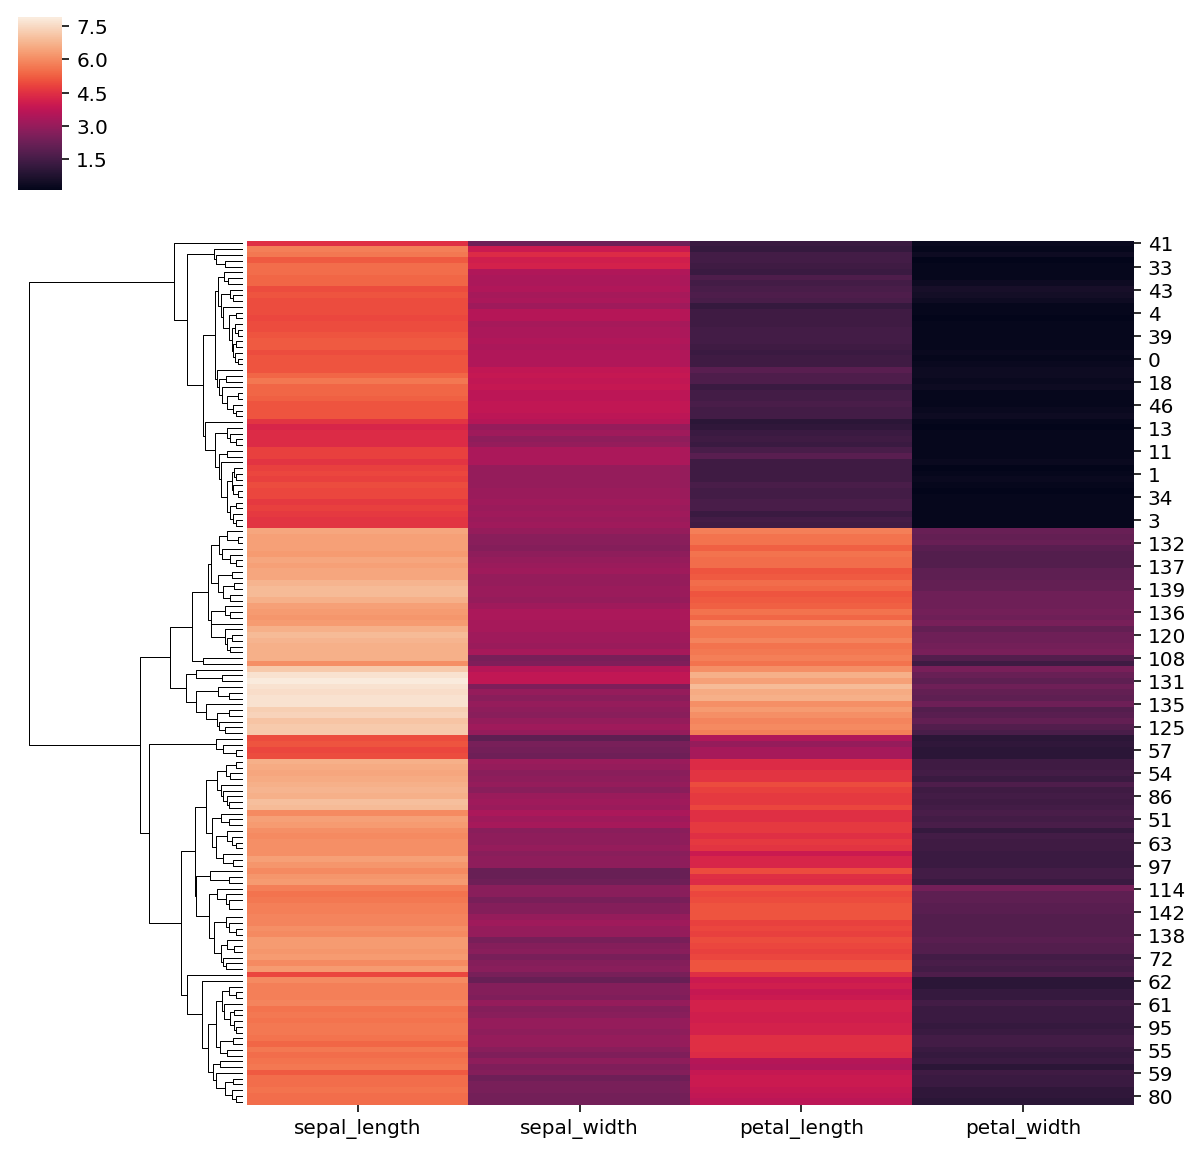

In [28]:
%matplotlib inline
import seaborn as sns
import numpy as np
iris = sns.load_dataset("iris")
sns.clustermap(iris[['sepal_length',  'sepal_width',  'petal_length',  'petal_width']], col_cluster=False);

   sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa


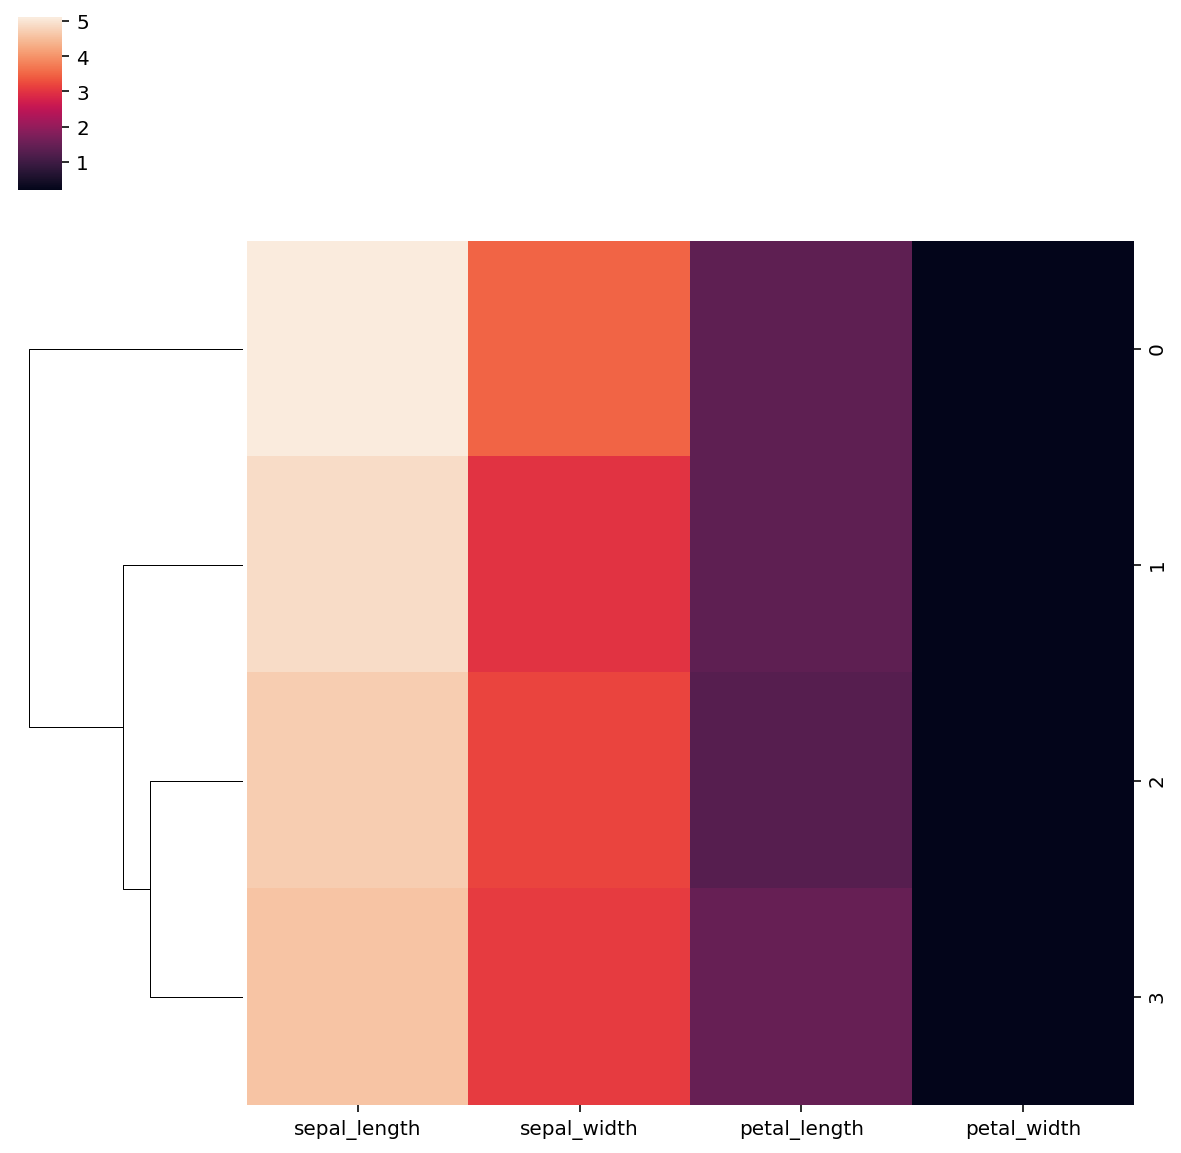

In [29]:
data = iris.iloc[:4,:]
print(data)
sns.clustermap(data[['sepal_length',  'sepal_width',  'petal_length',  'petal_width']], col_cluster=False);

### General Notes

- Sklearn's implementation uses 2 clusters and Euclidean distance by default
- There are other distance metrics that can be used such as “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’ distance measurments.
    - Ward linkage only accepts Euclidean distance
- Linkage refers to the methodoly we use to aggregate the distance metrics in each cluster before comparing that measurement with other clusters. So before we compare Cluster A with Cluster B, what metric should we be aggregrating between all the points within Cluster A
    - Ward: Minimizes the variance of the clusters being used
    - Average: Uses the average of all distances of each observation of the two sets
    - Complete/Maximum: Uses the maximum distance between all observations of the twos set
- In very large datasets memory can start to become an issue when determinting the linkage.
- Sklearn has a memory parameter to cache the tree after computatino to a subdirectory using joblib

Author: Kavi Sekhon